<a href="https://colab.research.google.com/github/wisrovi/03MAIR-Algoritmos-de-Optimizacion/blob/main/PuntoSuperiorDerecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre: William Steve Rodriguez Villamizar

# github: https://github.com/wisrovi/03MAIR-Algoritmos-de-Optimizacion/blob/main/PuntoSuperiorDerecho.ipynb

# colab: https://colab.research.google.com/github/wisrovi/03MAIR-Algoritmos-de-Optimizacion/blob/main/PuntoSuperiorDerecho.ipynb

# Librerias

In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
def Pintar(P, V, A = None):
  plt.scatter(*zip(*P))
  if A != None:
    plt.scatter(*zip(*A), c='green')
  plt.scatter(*zip(*V), c='red')
  plt.show()

# Ejemplo lista puntos a evaluar

In [ ]:
def puntoSectorInv(r,a):
  ang = math.pi * a / 180
  return (N*10 - int(r*math.sin(ang)), N*10 - int(r*math.cos(ang)))

In [ ]:
N = 25 # cantidad de puntos a generar

In [ ]:
puntos = [ puntoSectorInv(random.randrange(1, N), random.randrange(0, 90)) for _ in range(N) ]
print(len(puntos),puntos[:10])

25 [(234, 249), (243, 239), (250, 241), (243, 240), (235, 245), (235, 248), (243, 231), (237, 240), (250, 249), (249, 249)]


# Fuerza bruta

In [ ]:
# comprobamos que se cumple la condicion (A es esquina si está más a la derecha o más arriba que B): A_x > B_x ó que  A_y > B_y
def comprobar(A, B):
  return A[0] > B[0] or A[1] > B[1] or (A[0] == B[0] and A[1] == B[1])

def FuerzaBruta(L):
  longitud = len(L)
  resultado = []

  print('  Resolviendo por fuerza bruta: {0} puntos'.format(len(L)))
  for i in range(longitud):
    puedeSerEsquina = True
    for j in range(longitud):
      if i == j: continue
      if not comprobar(L[i], L[j]):
        puedeSerEsquina = False
        break

    if puedeSerEsquina:
      resultado.append(L[i])

  return resultado

## Ejemplo fuerza bruta

  Resolviendo por fuerza bruta: 25 puntos


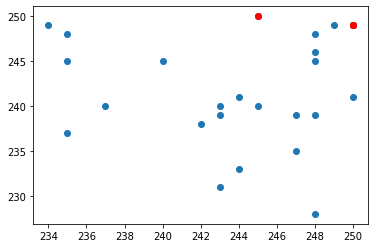

In [ ]:
vertices_bruto = FuerzaBruta(puntos)
#print (vertices_bruto)
Pintar(puntos, vertices_bruto)

# Divide y venceras

In [ ]:
# criterio de separación para elementos con más de una dimensión
# por cada dimensión, len(A), comprobamos si el valor es menor que el corte, componiendo todos mediante aritmetica booleana
def Porcion(A, B):
  return sum([ int(A[i] < B[i]) << i for i in range(len(A))])


# para calcular un punto intermedio de una lista dada: se utiliza promedia sobre un número dado de elementos
# los valores se cogen de forma aleatoria para mitigar problemas en listas ordenadas (por ejemplo)
def calcularPivote(L, N):
  largoLista = len(L)
  if largoLista == 0: return 0
  
  d = len(L[0])
  sumaParcial = (0,) * d

  for i in range(N):
      puntoAPromediar = L[random.randrange(0, largoLista)]
      sumaParcial = tuple(sumaParcial[i] + puntoAPromediar[i] for i in range(d))
  return tuple(i / N for i in sumaParcial)


def Divide(L):
  #Si hay pocos por Fuerza Bruta (se podría probar con distintos valores para decidir qué es "poco")
  if len(L) < 10: 
    return FuerzaBruta(L)
  
  # Dividir para listas grandes
  pivote = calcularPivote(L, 10)
  print('Corte {0}, sobre {1} puntos'.format(pivote, len(L)))
  subListas = [[] for _ in range(2 << len(L[0]))]
  for punto in L:
    subListas[Porcion(punto, pivote)].append(punto)


  for s in subListas:
    # solo por cubrirnos: comprobación de que no hayamos entrado en una condicion de bucle infinito (conjunto que no se puede trocear según nuestro criterio)
    # llegado el caso resolvemos por fuerza bruta --> estamos penalizando situaciones poco habituales, como que todos los puntos sean el mismo
    if len(s) == len(L): return FuerzaBruta(s)

  # sin tenemos cuadrante superior derecho
  # nos podemos olvidar del cuadrante inferior izquierdo (todo cubierto)
  # y los cuadrantes adyacentes se podrán considerar despues de reducirlos
  if len(subListas[0]) > 0:
    # buscamos esquinas en la parte superior derecha (este cuadrante cubre al resto)
    aristaExt = Divide(subListas[0])
    # y miramos cual es la cota superior (mayor ordenada) derecha (mayor abcisa) del resultado
    # lo que quede más arriba o más a la derecha no está cubierto
    mayorX, mayorY = -1, -1
    for i in aristaExt:
      if i[0] > mayorX: mayorX = i[0]
      if i[1] > mayorY: mayorY = i[1]

    # lista izquierda: filtramos puntos que estén por encima del mayor Y que tenemos, y calculamos sobre lo que quede
    aristaIzq = Divide([i for i in subListas[1] if i[1] > mayorY]) 
    # lista inferior: filtramos puntos que estén a la derecha del mayor X que tenemos, y calculamos sobre lo que quede
    aristaInf = Divide([i for i in subListas[2] if i[0] > mayorX])
    
    return aristaExt + aristaIzq + aristaInf
  
  # si no tenemos cuadrante superior derecho: no hace falta que le calculemos nada
  else:
    # comprobamos los cuadrante más externos que quedan: arriba-izquierda y abajo-derecha
    aristaIzq = Divide(subListas[1])
    aristaInf = Divide(subListas[2])
    # y miramos cual es la cota superior (mayor ordenada) y derecha (mayor abcisa) de los resultados
    # lo que quede más arriba Y más a la derecha no está cubierto en el cuadrante que queda
    mayorX, mayorY = -1, -1
    for i in aristaIzq:
      if i[0] > mayorX: mayorX = i[0]
    for i in aristaInf:
      if i[1] > mayorY: mayorY = i[1]
        
    # lista inferior izquierda: solo en este caso pueden ser candidatos
    # los puntos que queden arriba del punto más alto encontrado a su derecha (mayorY, de aristaInf)
    # Y a la derecha del punto más a la derecha encontrado encima (mayorX, de aristaIzq)
    aristaInt = Divide([i for i in subListas[3] if i[0] > mayorX and i[1] > mayorY])
    
    return aristaInt + aristaIzq + aristaInf

In [ ]:
def puntoSector(r,a):
  ang = math.pi * a / 180
  return (int(r*math.sin(ang)), int(r*math.cos(ang)))


## Ejemplo usando divide y venceras

Corte (244.1, 240.8), sobre 25 puntos
  Resolviendo por fuerza bruta: 8 puntos
  Resolviendo por fuerza bruta: 0 puntos
  Resolviendo por fuerza bruta: 0 puntos
[(250, 249), (250, 249), (245, 250)]


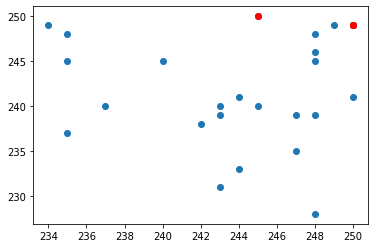

In [ ]:
vertices_divide = Divide(puntos)

# print(puntos)
print (vertices_divide)

Pintar(puntos, vertices_divide)

# Agradecimientos

### - Dios por darme los talentos y apoyo eterno
### - Juan Orea, por sus videos de youtube
### - Mi amada esposa por su apoyo incondicional